# Power Consumption Time Series Modeling

Name: Cassidy Exum


### Resources and Citation

Dataset Citation:

Salam, A., & El Hibaoui, A. (2018, December). Comparison of Machine Learning Algorithms for the Power Consumption Prediction:-Case Study of Tetouan cityâ€“. In 2018 6th International Renewable and Sustainable Energy Conference (IRSEC) (pp. 1-5). IEEE.â€

Notebook resources:
1. https://github.com/tatsath/fin-ml/blob/master/Chapter%205%20-%20Sup.%20Learning%20-%20Regression%20and%20Time%20Series%20models/Regression-MasterTemplate.ipynb

## Summary



## 1. Problem Statement and Business Understanding

## 2. Imports and Data Exploration

First step will be to bring in all the necesarry imports and begin exploring the data

For exploration, I'll start with the general dataframe information and then move onto visualizations using matplotlib, seaborn, or pandas plotting. Comments will be in each cell to explain what exactly that cell is doing

In [29]:
# Imports

# Base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

# Evaluation + Fine Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# sklearn Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor

# Keras Model
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import SGD
#from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [7]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the data and ensure it loaded properly

data = pd.read_csv('Data/Tetuan City Power Consumption.csv')
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [9]:
# Check Column Names
data.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [10]:
# Fix Zone 2 and Zone 3 names
data.rename(columns={"Zone 2  Power Consumption": "Zone 2 Power Consumption", 
                     "Zone 3  Power Consumption": "Zone 3 Power Consumption"}, inplace=True)

In [11]:
# Check feature types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   general diffuse flows     52416 non-null  float64
 5   diffuse flows             52416 non-null  float64
 6   Zone 1 Power Consumption  52416 non-null  float64
 7   Zone 2 Power Consumption  52416 non-null  float64
 8   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [12]:
# Shape
data.shape

(52416, 9)

In [13]:
# Convert DateTime column to DateTime for time series modeling
data.DateTime = pd.to_datetime(data.DateTime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DateTime                  52416 non-null  datetime64[ns]
 1   Temperature               52416 non-null  float64       
 2   Humidity                  52416 non-null  float64       
 3   Wind Speed                52416 non-null  float64       
 4   general diffuse flows     52416 non-null  float64       
 5   diffuse flows             52416 non-null  float64       
 6   Zone 1 Power Consumption  52416 non-null  float64       
 7   Zone 2 Power Consumption  52416 non-null  float64       
 8   Zone 3 Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [14]:
# Check out descriptive statistics
pd.set_option('precision', 3)
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000
mean,18.810,68.260,1.959,182.697,75.028,32344.971,21042.509,17835.406
std,5.815,15.551,2.349,264.401,124.211,7130.563,5201.466,6622.165
min,3.247,11.340,0.050,0.004,0.011,13895.696,8560.081,5935.174
25%,14.410,58.310,0.078,0.062,0.122,26310.669,16980.766,13129.327
50%,18.780,69.860,0.086,5.035,4.456,32265.920,20823.168,16415.117
75%,22.890,81.400,4.915,319.600,101.000,37309.018,24713.718,21624.100
max,40.010,94.800,6.483,1163.000,936.000,52204.395,37408.861,47598.326


In [15]:
# Set the index to the DateTime column for time-series modeling
data = data.set_index('DateTime')
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.696,16128.875,20240.964
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.684,19375.076,20131.084
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.101,19006.687,19668.434
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.861,18361.094,18899.277
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.696,17872.340,18442.410


Lets create some visualizations to better understand the data

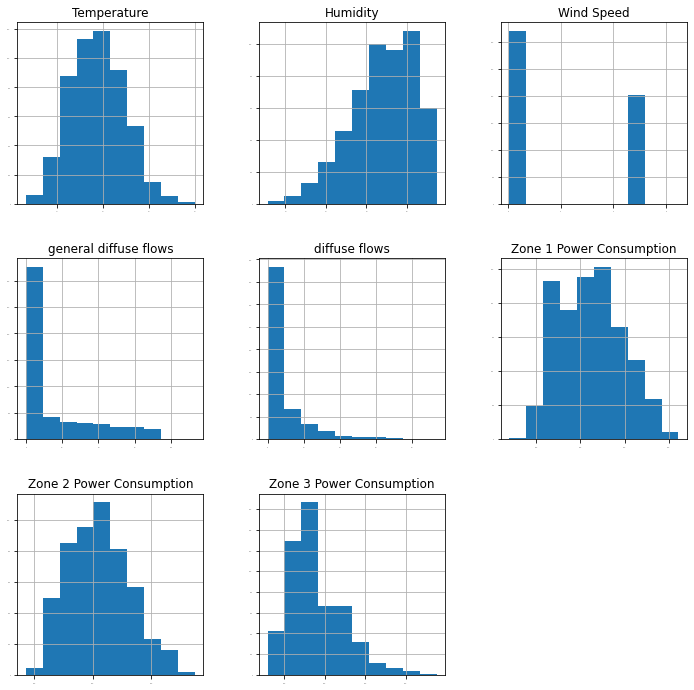

In [16]:
# Plot a histogram
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

What does this tell us? Temperature, Zone 1, and Zone 2 have normal distibutions of values. Humidity and Zone 3 Power Consumption are a bit skewed. Both Diffuse flows zolumns are very skewed, and wind speed seems to be between very close to either values of 0 and 5. I will later rescale, standardize, normalize to account for any weirdness in the data.

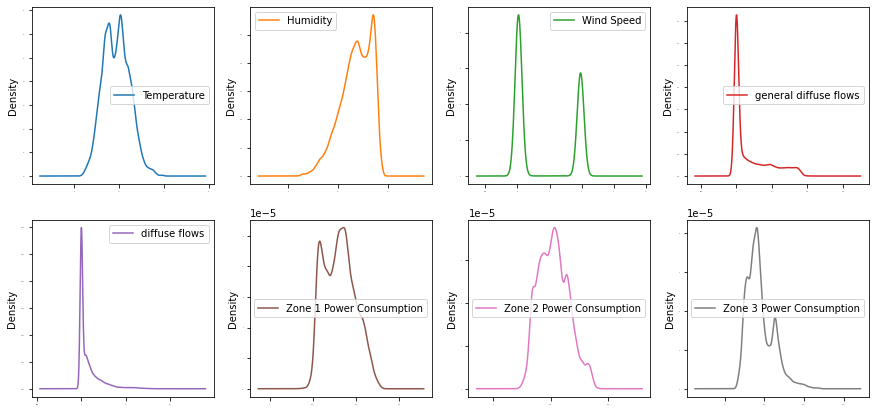

In [17]:
# Plot Density
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

Diffuse flows and General Diffuse flows may be too similar of features to keep both.

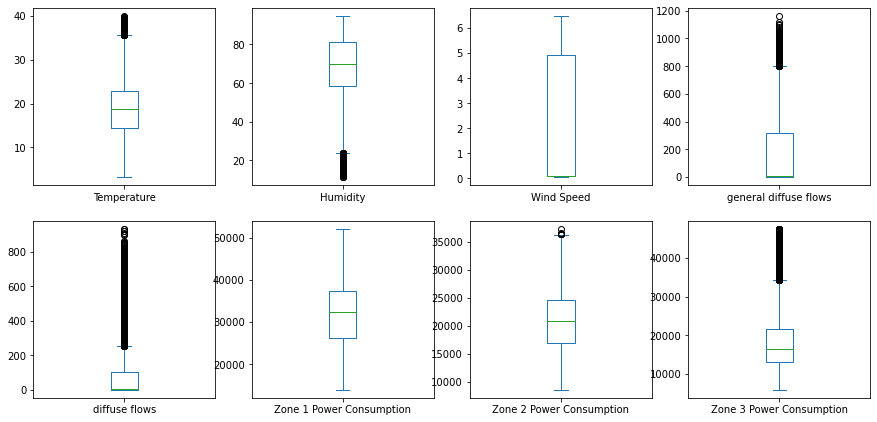

In [18]:
# Plot Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

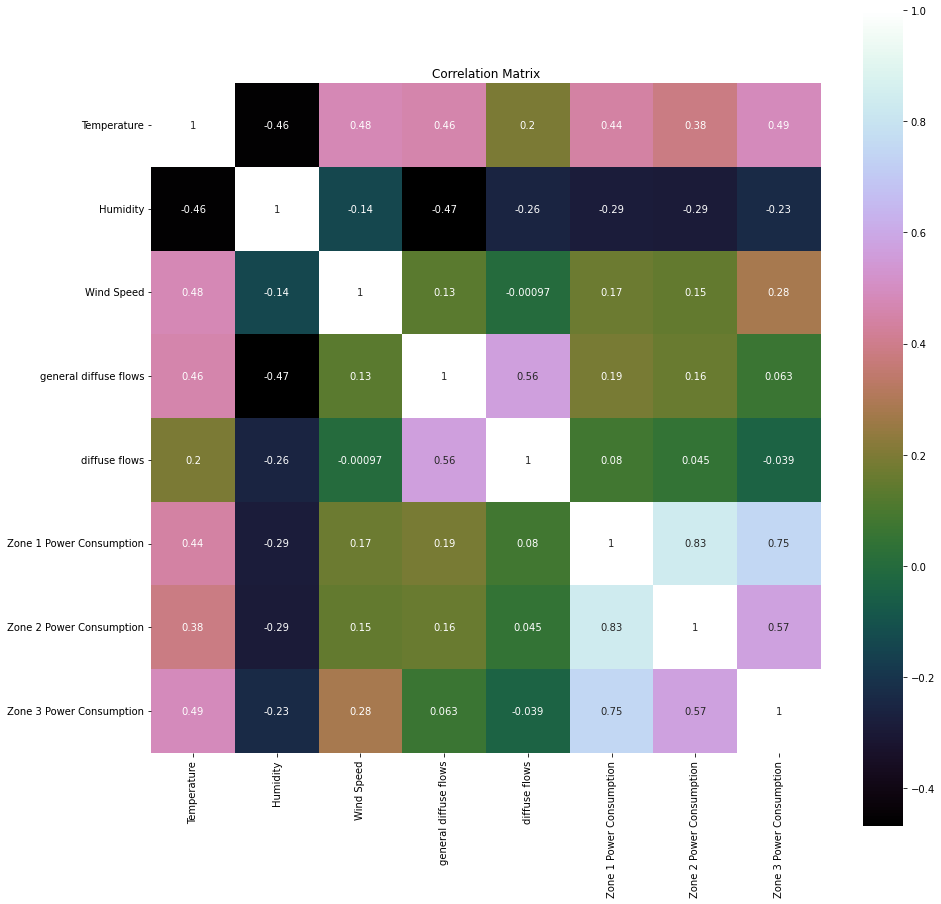

In [19]:
# correlation
correlation = data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix');

So from my initial hypothesis, I thought that temperature would be the largest predictor for power consumption, and I was correct. Sort of. I didn't intend to include the other Zones in my features. So for example, I intended to have 1 features dataframe and 3 targets, each Zone would be a target. However, because of the correlation making the zones the best predictors, it might be good to have 3 datasets and 3 targets. 

Also worth noting that Diffuse Flows and General Diffuse flows are only .56 correlated and I may not need to drop one of them.

##### Two Options are:

Predict each zone using features and other zones
1. df_1 = Features + Zone 2 + Zone 3
2. df_2 = Features + Zone 1 + Zone 3
3. df_2 = Features + Zone 1 + Zone 2

Predict each zone using *ONLY* features
1. Target_1 = Zone 1, df = Features
2. Target_2 = Zone 2, df = Features
3. Target_3 = Zone 3, df = Features

There aren't many features but there are 54000 rows. I'm unsure of the time it will take to run the models but if time is not an issue doing all 6 could be valuable, even if only for the best models.

My expected procedure will be to create a class or function that takes in a model, cross validation fold number, X, and Y, and returns the training and test scores. Possibly even returning a confusion matrix for more evaluation.

In [20]:
print(data.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption', 'Zone 2 Power Consumption',
       'Zone 3 Power Consumption'],
      dtype='object')


In [21]:
# Time-Series Analysis

Y_1 = data["Zone 1 Power Consumption"]
Y_2 = data["Zone 2 Power Consumption"]
Y_3 = data["Zone 3 Power Consumption"]

def plot_time_series(Y):
    """
    Inputs: Target Variable
    Returns: Nothing
    Prints: Time-Series Analysis Plots
    
    Period = 144 because there are 144 10-minute intervals in a day. I'm assume 1 day is the period. 
    Trend line should be stable now.
    """
    
    res = sm.tsa.seasonal_decompose(Y, period = 144)
    fig = res.plot()
    fig.set_figheight(8)
    fig.set_figwidth(15)
    plt.show()

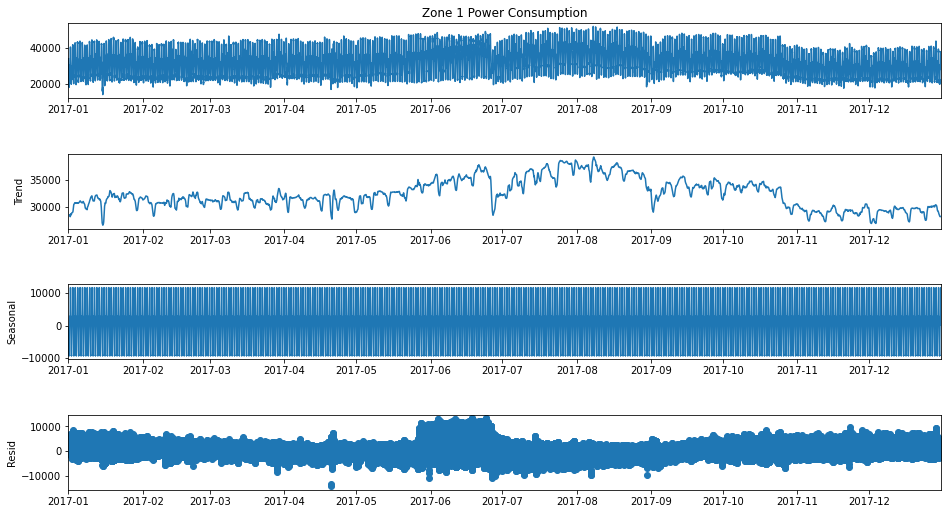

In [67]:
# Plot Zone 1
plot_time_series(Y_1)

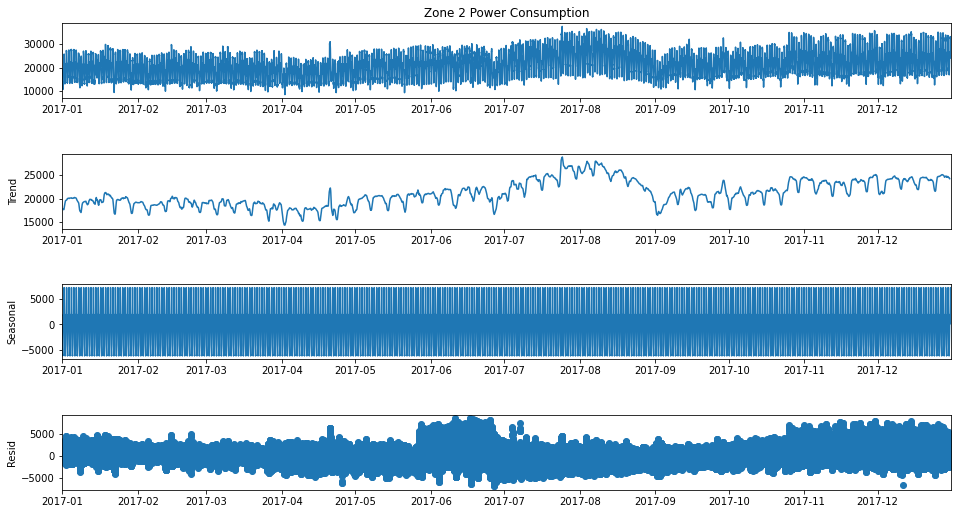

In [68]:
# Plot Zone 2
plot_time_series(Y_2)

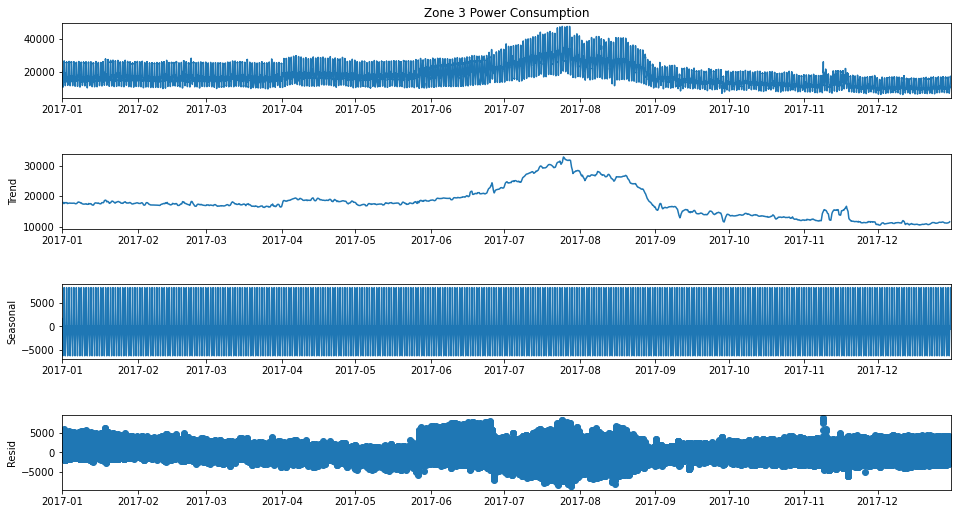

In [69]:
# Plot Zone 3
plot_time_series(Y_3)

In [73]:
# I checked for null value previously, but didn't explicitly mention it, here is a quick way to do so
print('Null Values =',data.isnull().values.any())

Null Values = False


## 3. Data Preperation

In this section I will be rescaling, standardizing, and normalizing the data using Sklearn libraries

In [74]:
# Seperate data in X and Y using the rules I mentioned above

Y_1 = data["Zone 1 Power Consumption"]
Y_2 = data["Zone 2 Power Consumption"]
Y_3 = data["Zone 3 Power Consumption"]

df_1 = data.drop('Zone 1 Power Consumption', axis=1)
df_2 = data.drop('Zone 2 Power Consumption', axis=1)
df_3 = data.drop('Zone 3 Power Consumption', axis=1)

features_only_df = data.drop(['Zone 1 Power Consumption',
                             'Zone 2 Power Consumption',
                             'Zone 3 Power Consumption'], axis=1)

In [83]:
# Check everything is correct
# Uncomment each df individually to check

#Y_1.head(2)
#Y_2.head(2)
#Y_3.head(2)

#df_1.head(2)
#df_2.head(2)
#df_3.head(2)

features_only_df.head(2)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
DateTime,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085


Rescale, Standardize, and Normalize data. TBD if I will use this but it's good to have

In [103]:
# Rescale Data
rescaler = MinMaxScaler(feature_range=(0, 1))
rescaled_df_1 = pd.DataFrame(rescaler.fit_transform(df_1))
rescaled_df_2 = pd.DataFrame(rescaler.fit_transform(df_2))
rescaled_df_3 = pd.DataFrame(rescaler.fit_transform(df_3))
rescaled_features_only = pd.DataFrame(rescaler.fit_transform(features_only_df))

# Standardize Data
Standardised_df_1 = pd.DataFrame(StandardScaler().fit_transform(df_1))
Standardised_df_2 = pd.DataFrame(StandardScaler().fit_transform(df_2))
Standardised_df_3 = pd.DataFrame(StandardScaler().fit_transform(df_3))
Standardised_features_only = pd.DataFrame(StandardScaler().fit_transform(features_only_df))

# Normalize Data
normalized_df_1 = pd.DataFrame(Normalizer().fit_transform(df_1))
normalized_df_2 = pd.DataFrame(Normalizer().fit_transform(df_2))
normalized_df_3 = pd.DataFrame(Normalizer().fit_transform(df_3))
normalized_features_only = pd.DataFrame(Normalizer().fit_transform(features_only_df))

## 4. Train-Test-Split

Seperate the data into training and validation sets. I think the data is dependent on the time-series so I have to seperate it non-randomly

In [125]:
# Instantiate common params, then split the data

test_size = .20
random_state = 42

train_size = int(len(data) * (1-test_size))

X_dfs = [df_1, df_2, df_3, features_only_df]
Y_dfs = [Y_1, Y_2, Y_3]
X_trains = []
X_vals = []
Y_trains = []
Y_vals = []

for X in X_dfs:
    X_train, X_validation = X[0:train_size], X[train_size:len(X)]
    X_trains.append(X_train)
    X_vals.append(X_validation)
    
for Y in Y_dfs:
    Y_train, Y_validation = Y[0:train_size], Y[train_size:len(X)]
    Y_trains.append(Y_train)
    Y_vals.append(Y_validation)

## 5.1 Base Modeling Techniques

First I'll create a list of basic models and a function that runs each of them storing the scores

In [161]:
# Instantiate number of folds for cross-validation, then begin adding basic models to a list
cv = 3

models = []

# Standard Models
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Neural Network
models.append(('MLP', MLPRegressor()))

# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))

# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [162]:
# Create a function to run the models for us so we can loop through them

# Instantiate an empty list for the names of the models
names = []

def run_models(X_train, Y_train, cv):
    """
    Inputs: X_train: A DataFrame with our X training set
            Y_train: A DataFrame with our Y training set
            cv:      Number of cross validation folds
    
    Outputs: Results: A list of the cv_results from each model
    """
    results = []
    for name, model in models:
        kfold = KFold(n_splits=cv, random_state=random_state)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return results

In [163]:
# Run the models on each different dataset
# Takes about 15 minutes with cv=3

print("df_1, Y_1")
print("Predicting Zone 1 using Features + Zone 2 + Zone 3")
df_1_results = run_models(X_trains[0], Y_trains[0], cv)

print()
print("df_2, Y_2")
print("Predicting Zone 2 using Features + Zone 1 + Zone 3")
df_2_results = run_models(X_trains[1], Y_trains[1], cv)

print()
print("df_3, Y_3")
print("Predicting Zone 3 using Features + Zone 1 + Zone 2")
df_3_results = run_models(X_trains[2], Y_trains[2], cv)

df_1, Y_1
Predicting Zone 1 using Features + Zone 2 + Zone 3
LR: 0.727197 (0.098856)
LASSO: 0.727228 (0.098856)
EN: 0.729938 (0.099892)
KNN: 0.681532 (0.231554)
CART: 0.599250 (0.159806)
SVR: 0.368982 (0.063787)
MLP: 0.605726 (0.353509)
ABR: 0.674134 (0.220519)
GBR: 0.773193 (0.155994)
XGB: 0.637934 (0.231063)
RFR: 0.698825 (0.156453)
ETR: 0.784825 (0.128126)

df_2, Y_2
Predicting Zone 2 using Features + Zone 1 + Zone 3
LR: 0.790433 (0.028622)
LASSO: 0.790482 (0.028569)
EN: 0.795277 (0.022570)
KNN: 0.757099 (0.104666)
CART: 0.695931 (0.038925)
SVR: 0.434857 (0.105227)
MLP: 0.807355 (0.057434)
ABR: 0.716249 (0.140991)
GBR: 0.810604 (0.015714)
XGB: 0.777158 (0.017202)
RFR: 0.796596 (0.015641)
ETR: 0.792721 (0.011046)

df_3, Y_3
Predicting Zone 3 using Features + Zone 1 + Zone 2
LR: 0.501942 (0.071414)
LASSO: 0.502036 (0.071322)
EN: 0.515615 (0.059928)
KNN: 0.609990 (0.054156)
CART: 0.518115 (0.152592)
SVR: 0.213830 (0.133688)
MLP: 0.705264 (0.070610)
ABR: 0.714819 (0.103903)
GBR: 0.68898

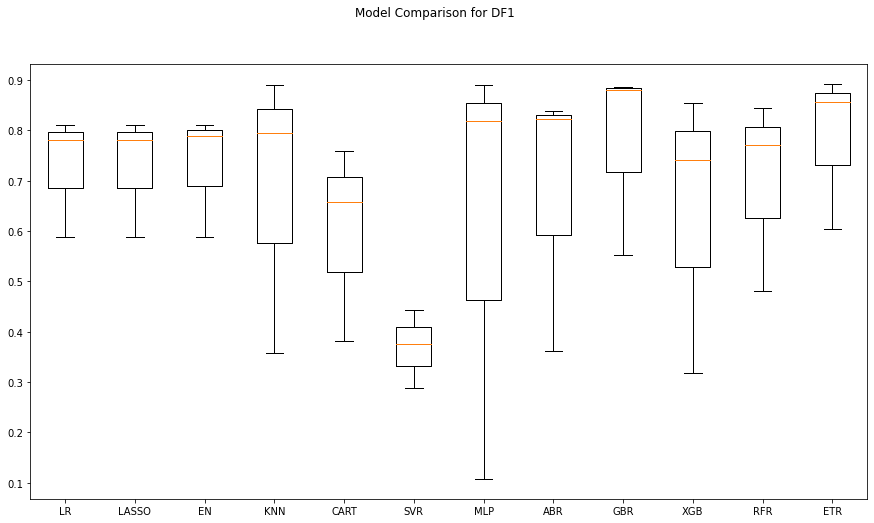

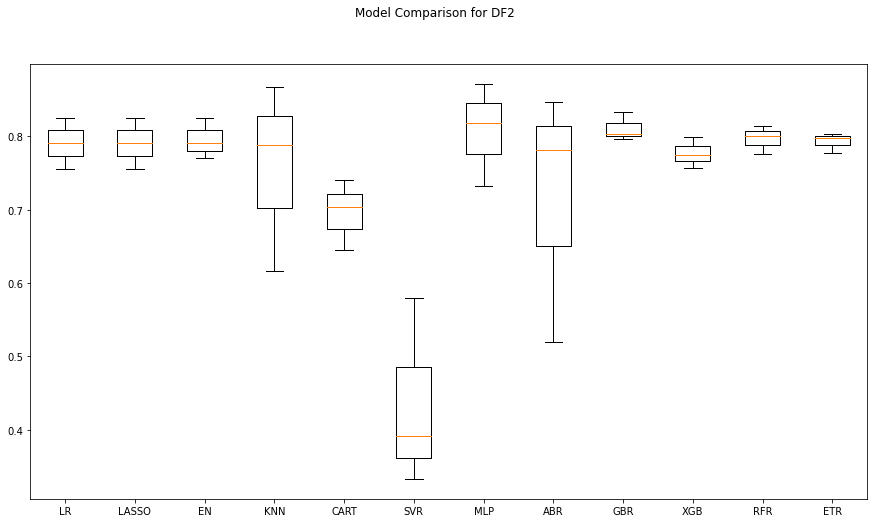

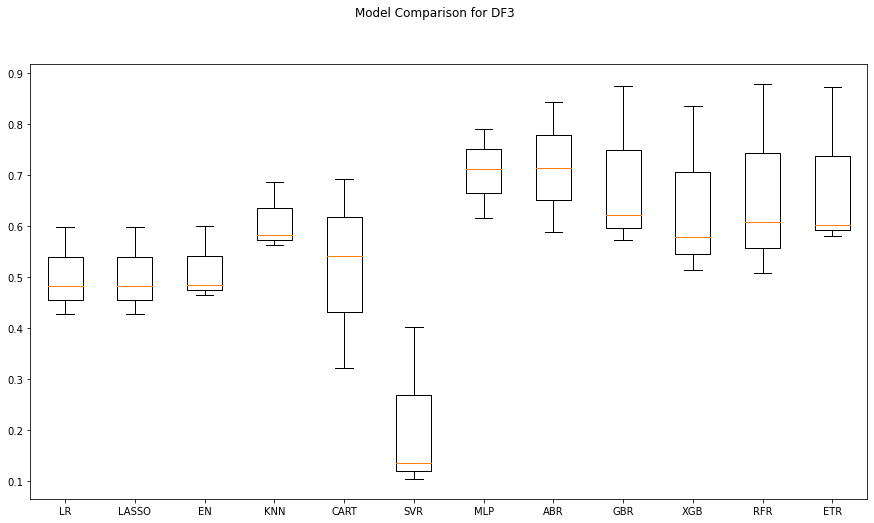

In [251]:
# Compare Models
fig = plt.figure()
fig.suptitle('Model Comparison for DF1')
ax = fig.add_subplot(111)
plt.boxplot(df_1_results)
ax.set_xticklabels(names[:12])
fig.set_size_inches(15,8)
plt.show()

fig = plt.figure()
fig.suptitle('Model Comparison for DF2')
ax = fig.add_subplot(111)
plt.boxplot(df_2_results)
ax.set_xticklabels(names[:12])
fig.set_size_inches(15,8)
plt.show()

fig = plt.figure()
fig.suptitle('Model Comparison for DF3')
ax = fig.add_subplot(111)
plt.boxplot(df_3_results)
ax.set_xticklabels(names[:12])
fig.set_size_inches(15,8)
plt.show()

In [245]:
# Neural Net
run_NN = False

def create_model(neurons=12, activation='relu', learn_rate = 0.01):
    # create model
    model = Sequential()
    model.add(Dense(neurons, activation=activation))
    
    # The number of hidden layers can be increased
    model.add(Dense(10, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(6, activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(3, activation=activation))
    
    # Final output layer
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    optimizer = SGD(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model   

if run_NN:
    model = KerasRegressor(build_fn=create_model)

In [247]:
# model.fit(df_1, Y_1, epochs=50, batch_size=32, validation_split=0.1)

Final Modeling checks I'm going to do before moving on Time-Series models and grid searching will be using normalized features only DF to predict the 3 different zone consumptions.

I'm also going to use a random train_test_split rather than having it sequential

In [248]:
norm_X_train1, norm_X_test1, y1_train, y1_test = train_test_split(
    normalized_features_only, Y_1, test_size=0.20, random_state=random_state)

norm_X_train2, norm_X_test2, y2_train, y2_test = train_test_split(
    normalized_features_only, Y_2, test_size=0.20, random_state=random_state)

norm_X_train3, norm_X_test3, y3_train, y3_test = train_test_split(
    normalized_features_only, Y_3, test_size=0.20, random_state=random_state)

In [249]:
print("Normalized Features DF, Y_1")
print("Predicting Zone 1 using Features + Zone 2 + Zone 3")
norm_1_results = run_models(norm_X_train1, y1_train, cv)

print()
print("Normalized Features DF, Y_2")
print("Predicting Zone 2 using Features + Zone 1 + Zone 3")
norm_2_results = run_models(norm_X_train2, y2_train, cv)

print()
print("Normalized Features DF, Y_3")
print("Predicting Zone 3 using Features + Zone 1 + Zone 2")
norm_3_results = run_models(norm_X_train3, y3_train, cv)

Normalized Features DF, Y_1
Predicting Zone 1 using Features + Zone 2 + Zone 3
LR: 0.185950 (0.002875)
LASSO: 0.185886 (0.002984)
EN: 0.023249 (0.000604)
KNN: 0.240671 (0.011669)
CART: -0.153604 (0.029522)
SVR: 0.023604 (0.004863)
MLP: 0.089140 (0.005833)
ABR: 0.167743 (0.003242)
GBR: 0.282247 (0.003059)
XGB: 0.345864 (0.002020)
RFR: 0.379022 (0.006820)
ETR: 0.370715 (0.003671)

ormalized Features DF, Y_2
Predicting Zone 2 using Features + Zone 1 + Zone 3
LR: 0.156298 (0.001853)
LASSO: 0.156174 (0.002097)
EN: 0.020091 (0.000410)
KNN: 0.225040 (0.012163)
CART: -0.192445 (0.006825)
SVR: 0.020045 (0.005763)
MLP: 0.100951 (0.006289)
ABR: 0.123505 (0.004898)
GBR: 0.264330 (0.002707)
XGB: 0.341188 (0.004475)
RFR: 0.374474 (0.001785)
ETR: 0.373267 (0.001687)

ormalized Features DF, Y_3
Predicting Zone 3 using Features + Zone 1 + Zone 2
LR: 0.202397 (0.003272)
LASSO: 0.202354 (0.003189)
EN: 0.005390 (0.000090)
KNN: 0.370531 (0.013379)
CART: 0.159288 (0.007689)
SVR: -0.036827 (0.002779)
MLP: 0.

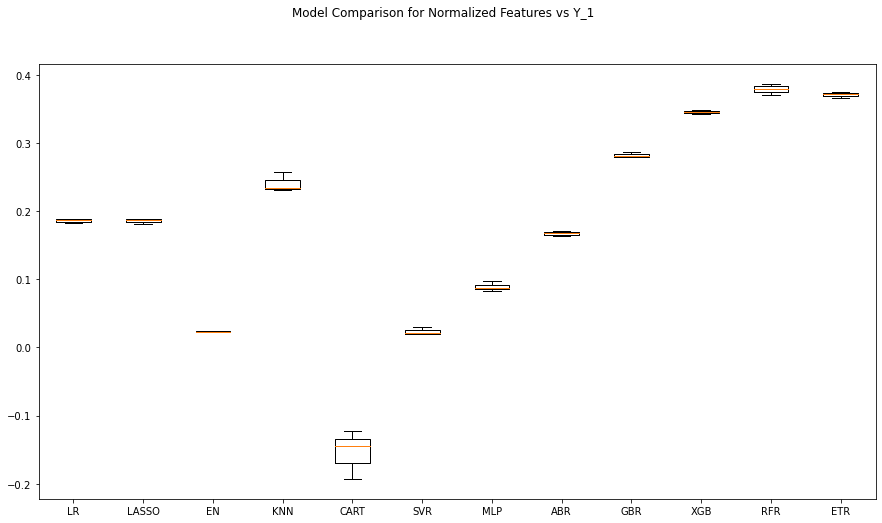

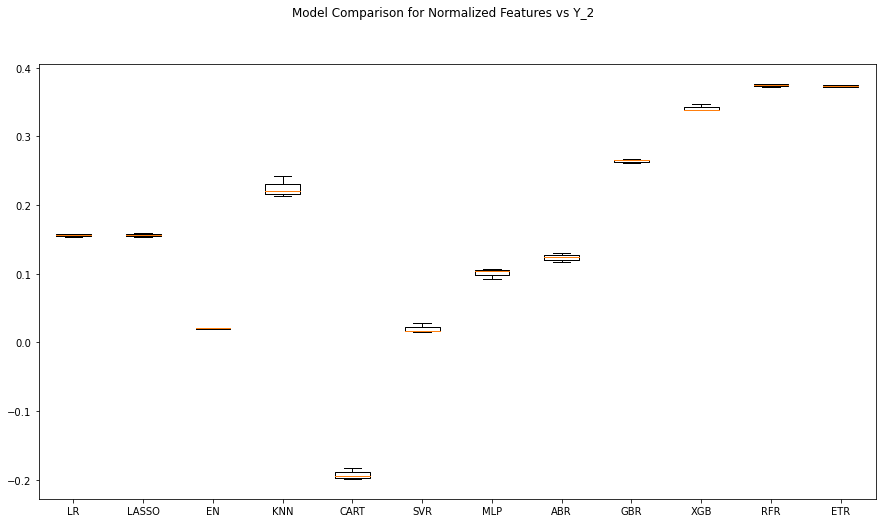

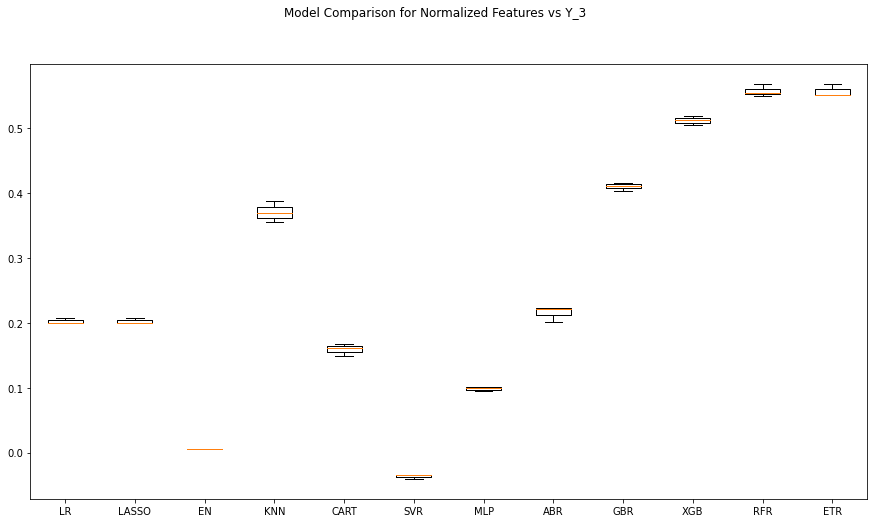

In [250]:
fig = plt.figure()
fig.suptitle('Model Comparison for Normalized Features vs Y_1')
ax = fig.add_subplot(111)
plt.boxplot(norm_1_results)
ax.set_xticklabels(names[:12])
fig.set_size_inches(15,8)
plt.show()

fig = plt.figure()
fig.suptitle('Model Comparison for Normalized Features vs Y_2')
ax = fig.add_subplot(111)
plt.boxplot(norm_2_results)
ax.set_xticklabels(names[:12])
fig.set_size_inches(15,8)
plt.show()

fig = plt.figure()
fig.suptitle('Model Comparison for Normalized Features vs Y_3')
ax = fig.add_subplot(111)
plt.boxplot(norm_3_results)
ax.set_xticklabels(names[:12])
fig.set_size_inches(15,8)
plt.show()

XGBoost, Random Forest Regressor, and Extra Trees Regressor are the clear best 3 models when it comes to the Normalized and fully random splits. They also perform near the top when the data is still sequential. Lets move forward with these 3 after the Time-Series Modeling

## 5.2 Time-Series Modeling Techniques

##### SARIMA Model

In [4]:
# SARIMA Model

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 144) for x in list(itertools.product(p, d, q))]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        mod = sm.tsa.statespace.SARIMAX(Y_1,
                                        order=comb,
                                        seasonal_order=combs,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        output = mod.fit()
        ans.append([comb, combs, output.aic])
        print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))

##### ARIMA Model

In [ ]:
# ARIMA Model

# Diff the dataset, then check
Y_1_diff = Y_1.diff()
Y_1_diff

In [ ]:
# Create the model on the difference dataset

# Can also plot ACF and PACF here

# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(data_diff, ax=ax, lags=8);

# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(data_diff, ax=ax, lags=8, method="ywm");

In [ ]:
# Fit an ARMA(1,0) model
mod_arma = ARIMA(Y_1_diff, order=(1, 0, 0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

##### Prophet Model

In [ ]:
from prophet import Prophet

Prophet_Model = Prophet(interval_width=0.95)

Prophet_model.fit(Y_1)
